In [1]:
import csv
import glob
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-whitegrid')
import numpy as np

In [2]:
def getAve(arr):
    return sum([int(x) for x in arr]) / len(arr)

def getListOfFiles(re, _pre = 7, _post = 4):
    return sorted(glob.glob(re), key=lambda s: int(s[_pre:-1 * _post]))

def getFirstRowOfCsv(file_name):
    with open(file_name, newline='') as csvfile:
        spamreader = csv.reader(csvfile, delimiter=',')
        # Retun the first row
        for row in spamreader:
            return row

In [6]:
### Global Variables
y = []
err = []
fileRE = '../experiments/Exp2-aws-ganache-done/Exp2-aws2-tenclient-*.csv'
# fileRE = '../experiments/Exp1-aws-ganache-done/Exp1-aws2-*.csv'
preChar = 26 + 11 + 20
postChar = 4

In [7]:
### Main Execution
for file_name in getListOfFiles(fileRE,preChar,postChar):
    row = np.asarray(getFirstRowOfCsv(file_name))
    
    print(file_name, row)

    y.append(getAve(row))
    err.append(np.std(row.astype(np.float)))

../experiments/Exp2-aws-ganache-done/Exp2-aws2-tenclient-1.csv ['508' '488' '453' '428' '431' '498' '434' '365' '344' '411' '345' '450'
 '337' '406' '351' '356' '418' '539' '508' '477']
../experiments/Exp2-aws-ganache-done/Exp2-aws2-tenclient-2.csv ['938' '940' '814' '777' '802' '845' '799' '820' '914' '793' '826' '844'
 '923' '851' '829' '862' '840' '865' '853' '854']
../experiments/Exp2-aws-ganache-done/Exp2-aws2-tenclient-3.csv ['1358' '1153' '1295' '1187' '1345' '1480' '1179' '1332' '1303' '1259'
 '1441' '1276' '1427' '1296' '1372' '1501' '1406' '1469' '1407' '1439']
../experiments/Exp2-aws-ganache-done/Exp2-aws2-tenclient-4.csv ['2000' '1916' '1833' '2087' '1855' '1988' '2080' '1976' '1872' '2138'
 '1980' '2176' '1921' '2163' '1968' '2265' '2021' '2232' '2255' '2365']
../experiments/Exp2-aws-ganache-done/Exp2-aws2-tenclient-5.csv ['2576' '2744' '2954' '2682' '2864' '2931' '2758' '2961' '3041' '2919'
 '3081' '3031' '3139' '2975' '3175' '3066' '3137' '3279' '3346' '3252']
../experim

[  427.35   849.45  1346.25  2054.55  2995.55  4342.3   6272.55  8773.95
 12089.55 16664.2  22676.85 31370.75 41885.35 57654.05]
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14]
[61.37937357125764, 46.10582934944344, 99.87986533831531, 147.3979223055739, 197.73959517506856, 258.46491057781907, 351.5923029589812, 610.9410343887533, 722.4974377117195, 1236.8552300087508, 1140.4975789101877, 2186.5957531057265, 2442.535184495814, 5286.252883423192]


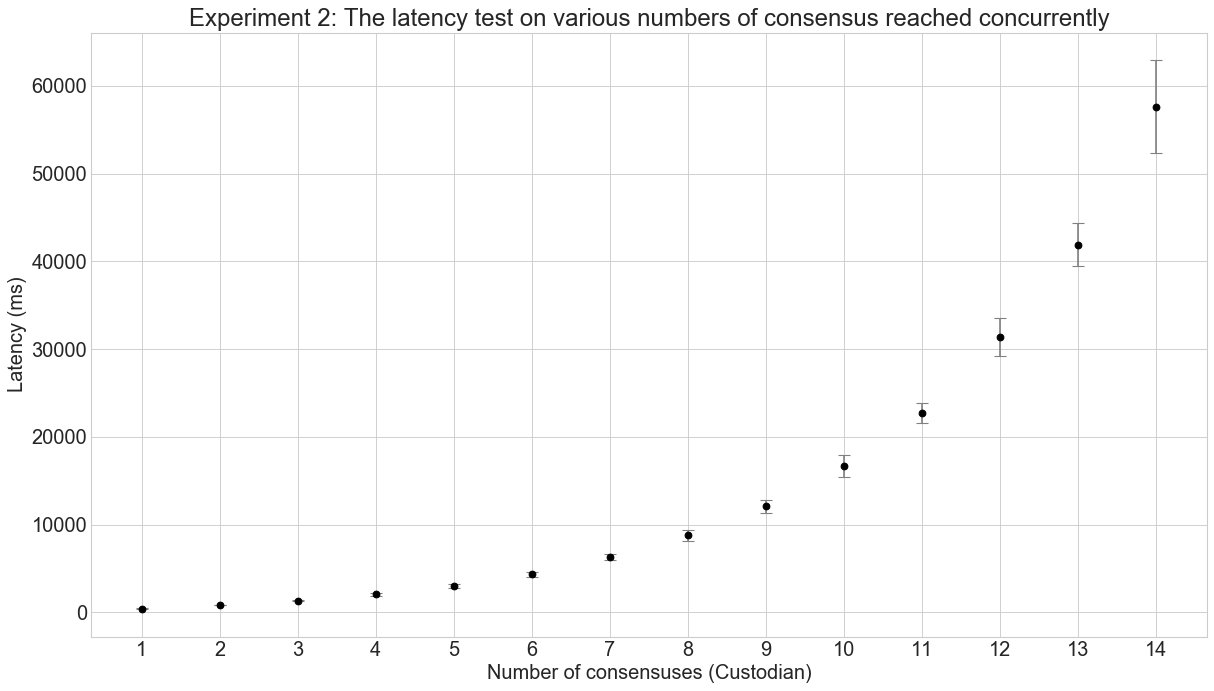

In [16]:
x = np.arange(1,15,1)
# x = np.arange(10,101,10)
y = np.asarray(y)
print(y)
print(x)
print(err)

plt.figure(num=None, figsize=(18, 10), dpi=80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': 18})
plt.xticks(np.arange(0, 15, step=1))
plt.yticks(np.arange(0, 70000, step=10000))
plt.xlabel("Number of consensuses (Custodian)")
# plt.xlabel("Number of voters (Clients)")
plt.ylabel("Latency (ms)")
plt.title("Experiment 2: The latency test on various numbers of consensus reached concurrently")
plt.errorbar(x, y, err, fmt="ok", capsize=5, ecolor="grey");